In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [4]:
df = sns.load_dataset("iris")

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
label_encode=LabelEncoder()
df["species"]=label_encode.fit_transform(df["species"])

In [13]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
label_encode.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

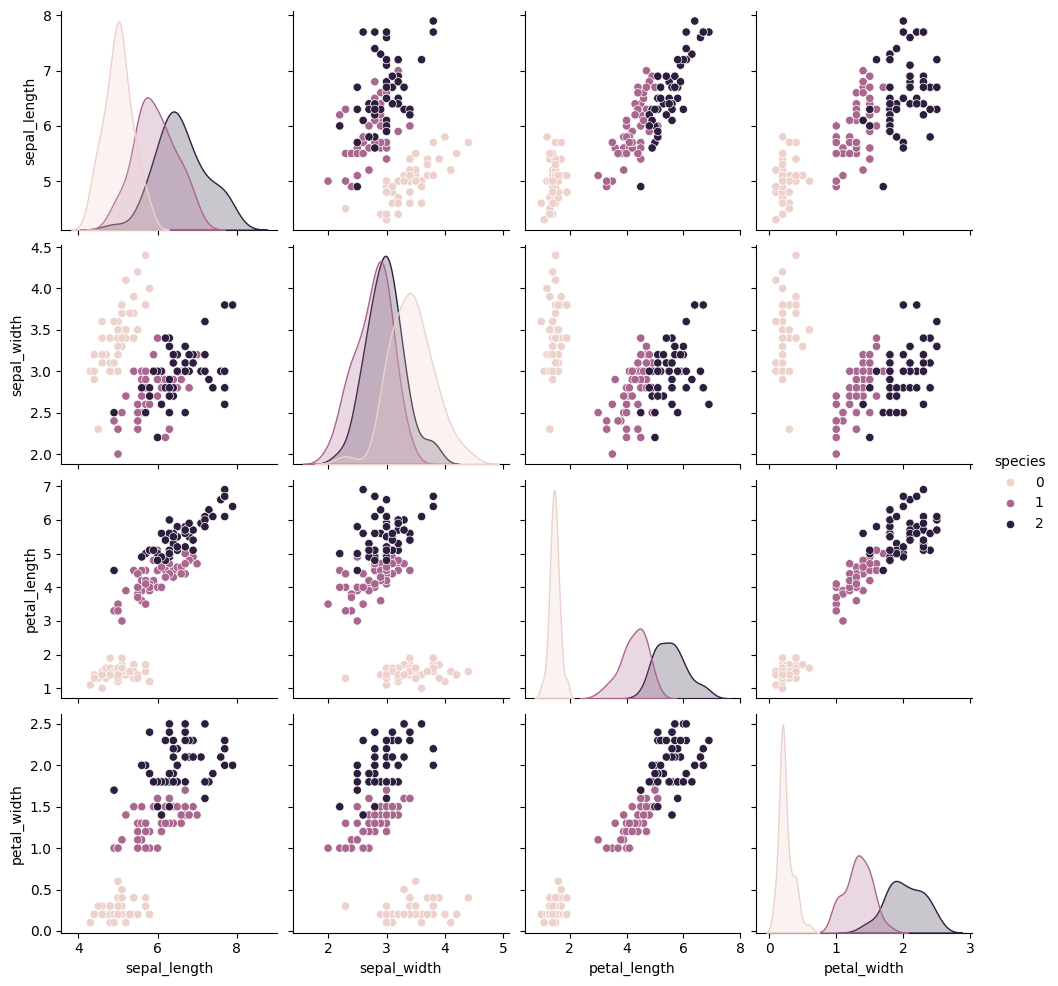

In [16]:
sns.pairplot(data=df,hue="species")

In [29]:
x_train,x_test, y_train,y_test=train_test_split(df.drop(columns=["species"]),df["species"],test_size=0.2)

In [30]:
lr=LogisticRegression(multi_class="multinomial")

In [31]:
lr.fit(x_train,y_train)

/Users/keshavmacbook/Projects/AI-ML/200days100model/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


In [32]:
y_pred=lr.predict(x_test)

In [33]:
accuracy_score(y_pred,y_test)

0.9333333333333333

In [37]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,12,0,0
1,0,6,0
2,0,2,10


In [39]:
precision_score(y_test,y_pred,average="macro")

0.9166666666666666

In [40]:
recall_score(y_pred,y_test,average="macro")

0.9166666666666666

In [41]:
f1_score(y_pred,y_test,average="macro")

0.9220779220779222

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.75      1.00      0.86         6
           2       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.94        30

